<a href="https://colab.research.google.com/github/Roy199898/1st-commit/blob/master/african_development_bank_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#load the dataset
finance=pd.read_csv('/content/finance1.csv',encoding='latin1')
finance


,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign
...,...,...,...,...,...,...,...,...,...
350,P-MA-HAA-001,1ère Ligne de Crédit à la Banque Nationale pou...,"3,912,222.92",Morocco,08 May 1974,Completion,African Development Bank,Finance,Sovereign
351,P-MW-HA0-001,Malawi Development Corporation,"1,485,997.20",Malawi,22 Nov 1972,Completion,African Development Bank,Finance,Sovereign
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,African Development Bank Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IATI Data Portal


#Preprocessing the data


In [11]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitment in U.A    336 non-null    object
 3   Country              336 non-null    object
 4   Starting Date        336 non-null    object
 5   Status               336 non-null    object
 6   Source of Financing  336 non-null    object
 7   Sector               336 non-null    object
 8   Sovereign            281 non-null    object
dtypes: object(9)
memory usage: 25.1+ KB


In [12]:
#checking the duplicate values
finance.duplicated().sum()

17

In [13]:
#knowing how manu NaN or missing values
finance.isna().sum()

Project Code           18
Title                  19
Commitment in U.A      19
Country                19
Starting Date          19
Status                 19
Source of Financing    19
Sector                 19
Sovereign              74
dtype: int64

#Clenaing the data


In [18]:
#dropping the NaN values
finance.dropna(inplace=True)

In [19]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitment in U.A    280 non-null    object
 3   Country              280 non-null    object
 4   Starting Date        280 non-null    object
 5   Status               280 non-null    object
 6   Source of Financing  280 non-null    object
 7   Sector               280 non-null    object
 8   Sovereign            280 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


In [21]:
#dropping the duplicates
finance.drop_duplicates(inplace=True)

In [22]:
finance.duplicated().sum()

0

In [23]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitment in U.A    280 non-null    object
 3   Country              280 non-null    object
 4   Starting Date        280 non-null    object
 5   Status               280 non-null    object
 6   Source of Financing  280 non-null    object
 7   Sector               280 non-null    object
 8   Sovereign            280 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


We notice that starting date date types is object not dateTime so we will change it

In [38]:
finance['Starting Date']=pd.to_datetime(finance['Starting Date'])

In [39]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Project Code         280 non-null    object        
 1   Title                280 non-null    object        
 2   Commitment in U.A    280 non-null    object        
 3   Country              280 non-null    object        
 4   Starting Date        280 non-null    datetime64[ns]
 5   Status               280 non-null    object        
 6   Source of Financing  280 non-null    object        
 7   Sector               280 non-null    object        
 8   Sovereign            280 non-null    object        
 9   Staring Date         280 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 31.1+ KB


In [40]:
#Creating a new column to show the date by the year
finance['starting_year']=finance['Starting Date'].dt.year

In [28]:
finance

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,Staring Date
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign,2020
...,...,...,...,...,...,...,...,...,...,...
346,P-MA-HAA-002,Deuxième Ligne de Crédit à Banque Nationale po...,"2,851,738.40",Morocco,16 Jul 1976,Completion,African Development Bank,Finance,Sovereign,1976
347,P-TN-HA0-001,1ere Ligne de Crédit à la Banque de développem...,"3,000,000.00",Tunisia,16 Jul 1976,Completion,African Development Bank,Finance,Sovereign,1976
349,P-BI-H00-001,Ligne de Crédit,"3,975,264.91",Burundi,21 Nov 1974,Completion,African Development Bank,Finance,Sovereign,1974
350,P-MA-HAA-001,1ère Ligne de Crédit à la Banque Nationale pou...,"3,912,222.92",Morocco,08 May 1974,Completion,African Development Bank,Finance,Sovereign,1974


In [45]:
finance = finance.rename(columns={'Staring Date': 'starting year'})
finance

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,starting year,starting_year
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,2020-10-28,Approved,African Development Fund,Finance,Sovereign,2020,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,2020-10-13,Implementation,Fragile States Facility,Finance,Sovereign,2020,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,2020-05-15,Implementation,Fragile States Facility,Finance,Sovereign,2020,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,2020-04-27,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,2020-04-15,Approved,African Development Bank,Finance,Non Sovereign,2020,2020
...,...,...,...,...,...,...,...,...,...,...,...
346,P-MA-HAA-002,Deuxième Ligne de Crédit à Banque Nationale po...,"2,851,738.40",Morocco,1976-07-16,Completion,African Development Bank,Finance,Sovereign,1976,1976
347,P-TN-HA0-001,1ere Ligne de Crédit à la Banque de développem...,"3,000,000.00",Tunisia,1976-07-16,Completion,African Development Bank,Finance,Sovereign,1976,1976
349,P-BI-H00-001,Ligne de Crédit,"3,975,264.91",Burundi,1974-11-21,Completion,African Development Bank,Finance,Sovereign,1974,1974
350,P-MA-HAA-001,1ère Ligne de Crédit à la Banque Nationale pou...,"3,912,222.92",Morocco,1974-05-08,Completion,African Development Bank,Finance,Sovereign,1974,1974


#Analysis and Visualization

We will focus on date with date =2019


In [46]:
finance2=finance[finance['starting_year'] == 2019]

In [47]:
#Showing all the data with starting date =2019
finance2

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,starting year,starting_year
10,P-ML-HZ0-001,Mali - African Trade Insurance Agency (ATI): C...,"7,290,000.00",Mali,2019-12-05,Approved,African Development Fund,Finance,Sovereign,2019,2019
11,P-KE-HAB-030,Kenya - Equity Group Holdings Plc,"73,173,765.74",Kenya,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019,2019
12,P-MA-HAA-012,"Morocco - ""Fonds dEquipement Communal (FEC)""","79,781,717.22",Morocco,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019,2019
13,P-Z1-HB0-064,Multinational  Project for Digitisation of Go...,"1,258,000.00",Multinational,2019-11-25,Implementation,Fragile States Facility,Finance,Sovereign,2019,2019
14,P-Z1-HB0-071,SIERRA LEONE - Government Payments Digitizatio...,"279,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019,2019
15,P-Z1-HB0-072,GOVERNMENT PAYMENTS (P2G & G2P) DIGITIZATION I...,"463,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019,2019
16,P-Z1-H00-072,Multinational - Projet dAppui au Démarrage du...,"783,328.00",Multinational,2019-11-21,Approved,Middle Income Countries Fund,Finance,Sovereign,2019,2019
17,P-GN-HA0-001,Guinea - Vista Bank - Africa SME Programme,"5,853,901.26",Guinea,2019-09-24,Approved,African Development Bank,Finance,Non Sovereign,2019,2019
18,P-SN-HA0-002,Sénégal - Banque Nationale pour le Développeme...,"11,967,257.58",Senegal,2019-09-24,Approved,African Development Bank,Finance,Non Sovereign,2019,2019
20,P-KE-HAB-026,Kenya - Credit Bank PLC (CBP),"5,666,565.14",Kenya,2019-07-17,Approved,African Development Bank,Finance,Non Sovereign,2019,2019


In [61]:
#removing the unnecessary columns
finance2 = finance2.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sector', 'Sovereign','starting year'], axis=1,errors='ignore')

In [62]:
finance2

,Commitment in U.A,Country,starting_year
10,"7,290,000.00",Mali,2019
11,"73,173,765.74",Kenya,2019
12,"79,781,717.22",Morocco,2019
13,"1,258,000.00",Multinational,2019
14,"279,000.00",Multinational,2019
15,"463,000.00",Multinational,2019
16,"783,328.00",Multinational,2019
17,"5,853,901.26",Guinea,2019
18,"11,967,257.58",Senegal,2019
20,"5,666,565.14",Kenya,2019


In [63]:
finance2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Commitment in U.A  26 non-null     object
 1   Country            26 non-null     object
 2   starting_year      26 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 728.0+ bytes


We can notice that the Commitment in U.A date type is object is not numerical

In [64]:
#Changing the column data type to numeric
finance2['Commitment in U.A']=finance2['Commitment in U.A'].str.replace(r',','')
finance2['Commitment in U.A']=finance2['Commitment in U.A'].apply(pd.to_numeric)

In [65]:
finance2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commitment in U.A  26 non-null     float64
 1   Country            26 non-null     object 
 2   starting_year      26 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 728.0+ bytes


In [66]:
#Getting the number of each country with Commitment in U.A in data
finance2['Country'].value_counts().reset_index()

,Country,count
0,Multinational,10
1,Tunisia,4
2,Kenya,3
3,Mali,1
4,Morocco,1
5,Guinea,1
6,Senegal,1
7,Rwanda,1
8,Mozambique,1
9,Madagascar,1


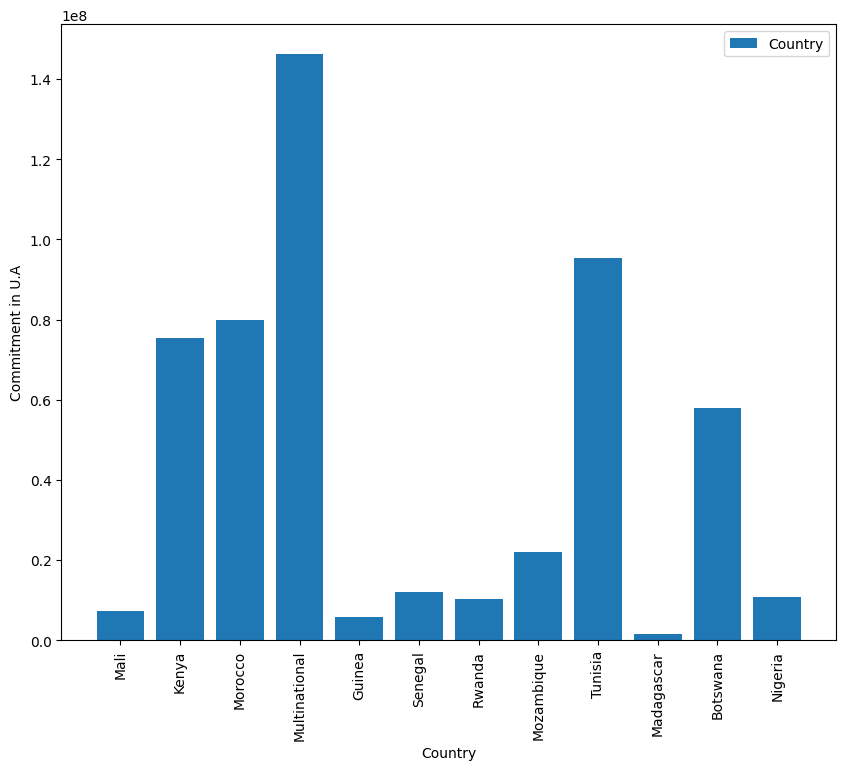

In [69]:
plt.figure(figsize=(10,8))
plt.bar(finance2['Country'],finance2['Commitment in U.A'],label='Country')
plt.xticks(rotation=90)
plt.title=('Commitment in U.A and Country')
plt.xlabel('Country')
plt.ylabel('Commitment in U.A')
plt.legend()
plt.show()

From Graph then Multinational is the greater of Commitment in U.A and Madagascar is Smaller

<Axes: xlabel='Country', ylabel='Commitment in U.A'>

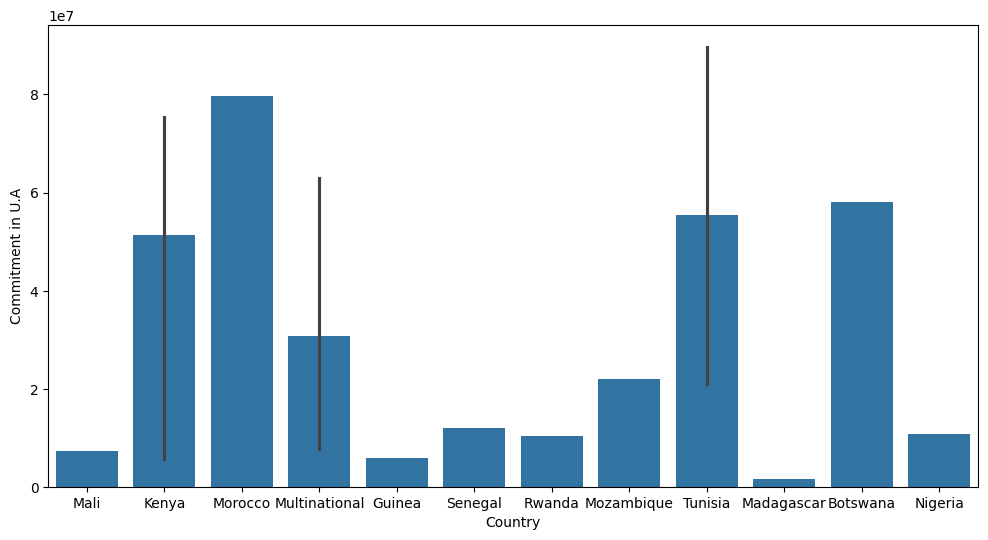

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country',y='Commitment in U.A',data=finance2)

#Conclusion
We can notice that Multinational invetors invest in a lot of projects, this can deceive us  and make us say that they are in the first place,but when we look at the total amount of investments we notice that Morocco,Botswana,Tunisia, and Keneya has more investments, and this is the final reslut of our Analysis.